# Week 03: Data Viz

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from palmerpenguins import load_penguins
df = load_penguins()
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
print(df.describe())
print(df.dtypes)
print(df.columns)

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g      

#### Indexing

In [5]:
print(df.values)
i=1
j=0
print(df.loc[i])
print(df.iloc[i,j])
print(df[['bill_length_mm','island']])
print(df.query("year > 2007"))

[['Adelie' 'Torgersen' 39.1 ... 3750.0 'male' 2007]
 ['Adelie' 'Torgersen' 39.5 ... 3800.0 'female' 2007]
 ['Adelie' 'Torgersen' 40.3 ... 3250.0 'female' 2007]
 ...
 ['Chinstrap' 'Dream' 49.6 ... 3775.0 'male' 2009]
 ['Chinstrap' 'Dream' 50.8 ... 4100.0 'male' 2009]
 ['Chinstrap' 'Dream' 50.2 ... 3775.0 'female' 2009]]
species                 Adelie
island               Torgersen
bill_length_mm            39.5
bill_depth_mm             17.4
flipper_length_mm        186.0
body_mass_g             3800.0
sex                     female
year                      2007
Name: 1, dtype: object
Adelie
     bill_length_mm     island
0              39.1  Torgersen
1              39.5  Torgersen
2              40.3  Torgersen
3               NaN  Torgersen
4              36.7  Torgersen
..              ...        ...
339            55.8      Dream
340            43.5      Dream
341            49.6      Dream
342            50.8      Dream
343            50.2      Dream

[344 rows x 2 columns]
     

In [18]:
df[0:2]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007


In [13]:
df.iloc[0,0]

'Adelie'

In [11]:
# First row, access "body mass g" col
df.loc[0].body_mass_g 

3750.0

In [21]:
columns = ["species", "island"] # using square brackets to represent a list

df[columns][0:2]                # using square brackets for indexing

,species,island
0,Adelie,Torgersen
1,Adelie,Torgersen


In [29]:
df.query("year > 2007")


# Multiple conditions
df[(df.sex == "female") & (df.year > 2007)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
50,Adelie,Biscoe,39.6,17.7,186.0,3500.0,female,2008
52,Adelie,Biscoe,35.0,17.9,190.0,3450.0,female,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
56,Adelie,Biscoe,39.0,17.5,186.0,3550.0,female,2008
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
...,...,...,...,...,...,...,...,...
335,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female,2009
337,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female,2009
338,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009


### Plotting

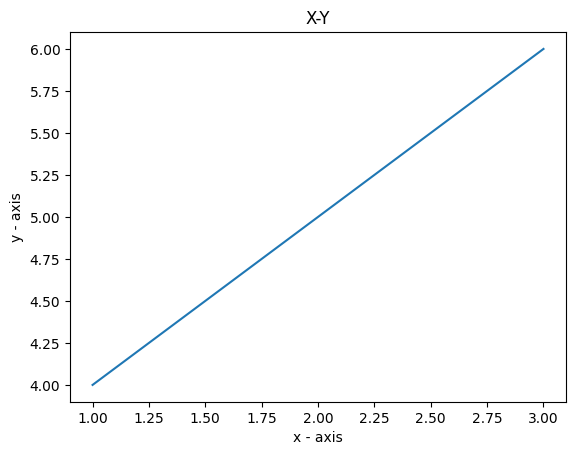

In [32]:
# X values
x = [1,2,3]
# Y values
y = [4,5,6]     # automatically matches each (x,y) pair based on the same index.  
	
# Plotting the points
plt.plot(x, y)
	
# Naming the X and Y axes
plt.xlabel('x - axis')
plt.ylabel('y - axis')
	
# Adding a title
plt.title('X-Y')
	
# Showing the plot
plt.show()

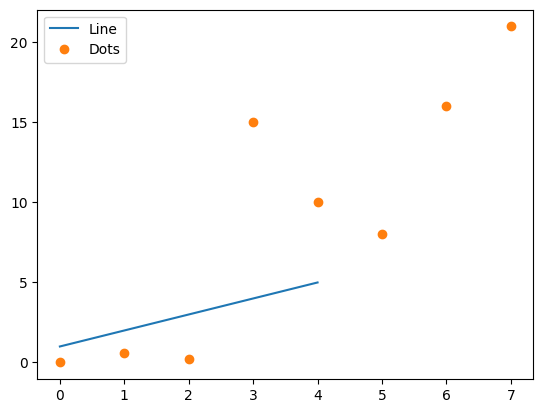

In [36]:
a = [1, 2, 3, 4, 5]
b = [0, 0.6, 0.2, 15, 10, 8, 16, 21]
plt.plot(a)
# o is for circles
plt.plot(b, "o")

# Get current axes and plot the legend
ax = plt.gca()
ax.legend(['Line', 'Dots'])

plt.show()

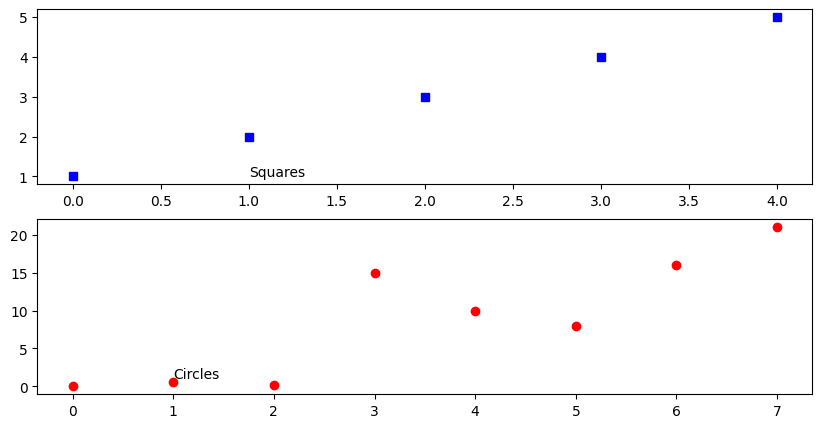

In [47]:
fig = plt.figure(figsize =(10, 5))
sub1 = plt.subplot(2, 1, 1) # two plots, or 2 rows, one column, position 1
sub2 = plt.subplot(2, 1, 2) # two plots, or 2 rows, one column, position 2
sub1.plot(a, 'sb') # squares, blue
sub1.annotate("Squares", (1,1))
sub2.plot(b, 'or') # circles, red
sub2.annotate("Circles", (1,1)) 
plt.show()

#### Seaborn plots

<Axes: xlabel='island', ylabel='Count'>

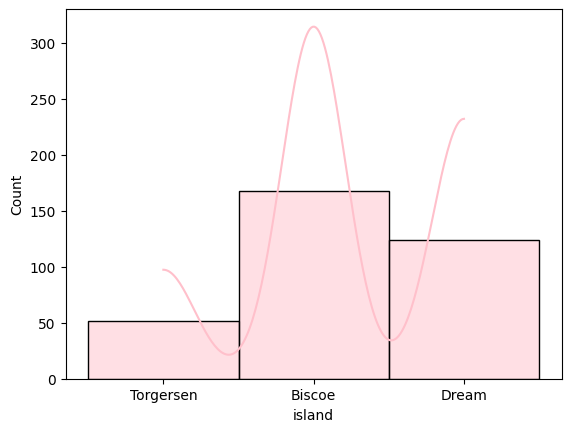

In [56]:
sns.histplot(df['island'],kde=True,bins=10, color="pink")

#### Joint plots

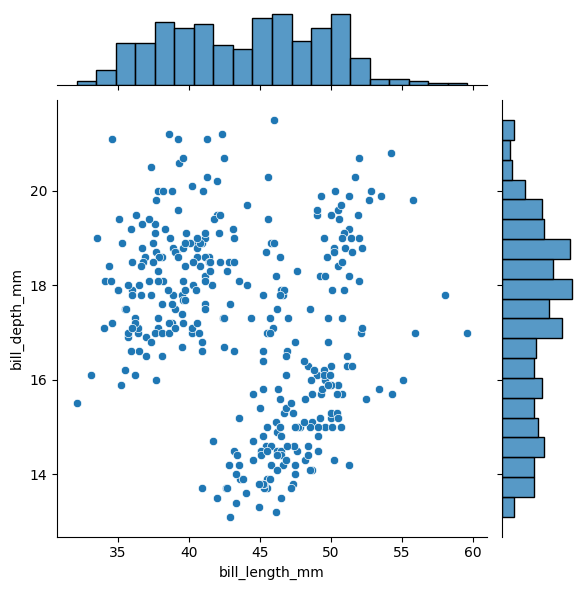

In [60]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm", marginal_kws=dict(bins=20)) 

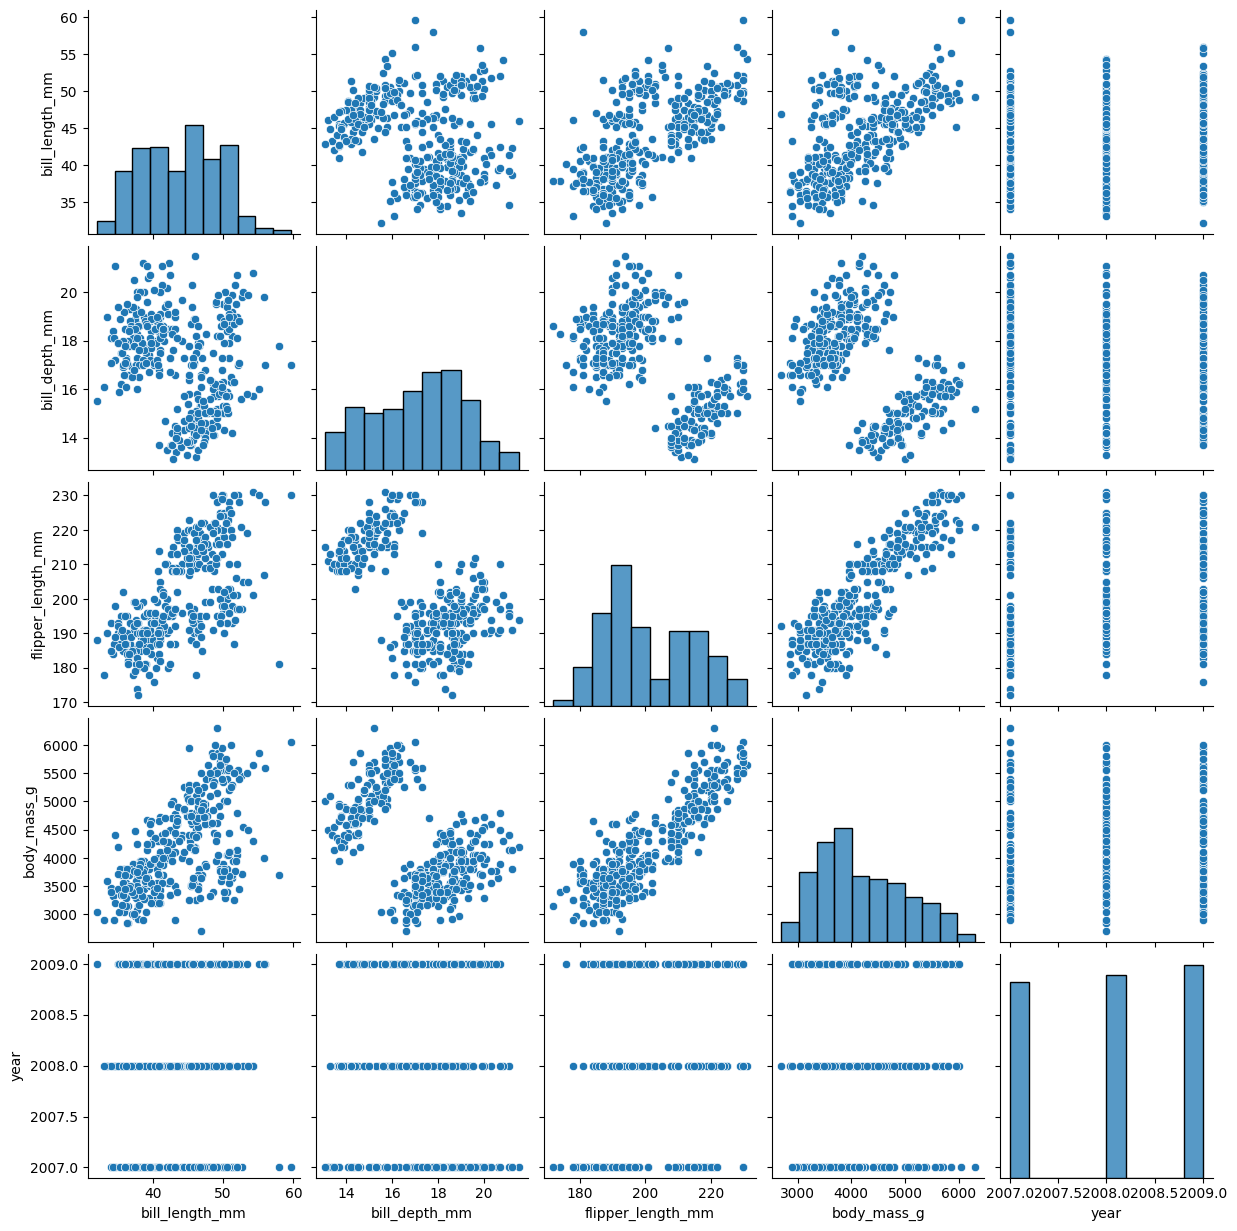

In [61]:
sns.pairplot(df)

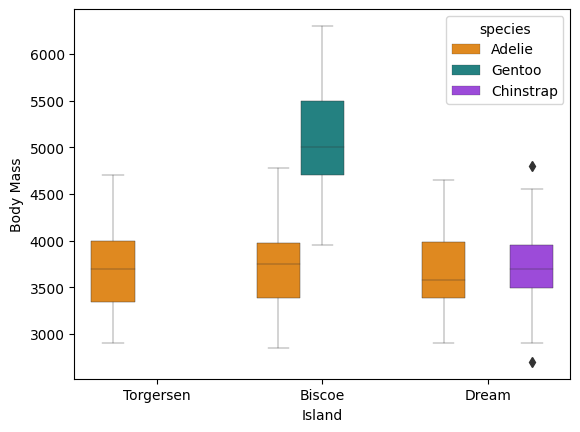

In [66]:
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',    # can change this
            data = df,
            palette=['#FF8C00','#159090','#A034F0'],  # custom, could use inbuilt ones
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')
plt.show() 


# note how before we provided "x" and "y" as actual columns from the df (e.g. `df.island`)
# but now we give the dataframe as a 'data' argument and separately provide the names
# of the columns we want to use as our x and y (columns given as *strings*)

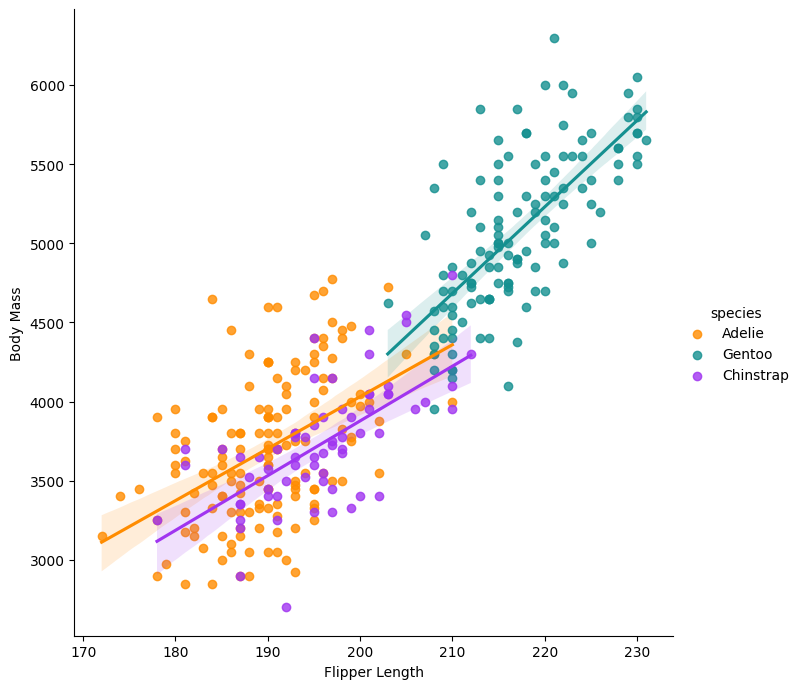

In [69]:
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=df,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')
plt.show() 

# remember, we can change the plotting of colours just by passing another name of a column, 
# because we are giving all the data as `df`

#### Multiple figures

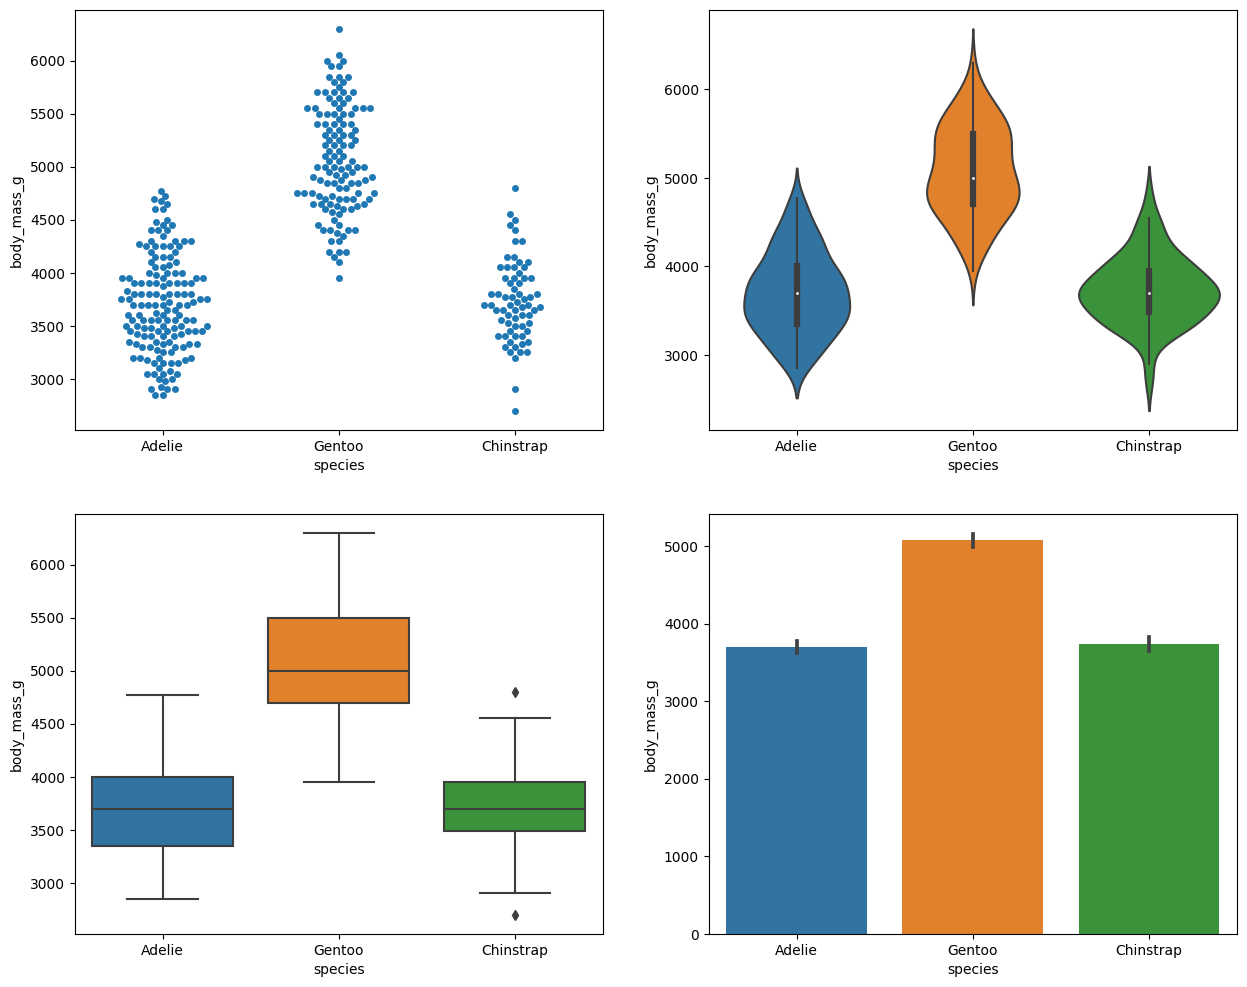

In [71]:
import matplotlib.pyplot as pltt
fig ,ax = pltt.subplots(figsize=(15,12), ncols=2,nrows=2) # make a 2x2 grid
sns.swarmplot(data=df,x='species',y='body_mass_g',ax=ax[0,0], hue='species') 
sns.violinplot(data=df,x='species',y='body_mass_g',ax=ax[0,1])
sns.boxplot(data=df,x='species',y='body_mass_g',ax=ax[1,0])
sns.barplot(data=df,x='species',y='body_mass_g',ax=ax[1,1])
pltt.show()

### Saving file

In [72]:
df.to_csv?

Signature:
df.to_csv(
    path_or_buf: 'FilePath | WriteBuffer[bytes] | WriteBuffer[str] | None' = None,
    sep: 'str' = ',',
    na_rep: 'str' = '',
    float_format: 'str | Callable | None' = None,
    columns: 'Sequence[Hashable] | None' = None,
    header: 'bool_t | list[str]' = True,
    index: 'bool_t' = True,
    index_label: 'IndexLabel | None' = None,
    mode: 'str' = 'w',
    encoding: 'str | None' = None,
    compression: 'CompressionOptions' = 'infer',
    quoting: 'int | None' = None,
    quotechar: 'str' = '"',
    lineterminator: 'str | None' = None,
    chunksize: 'int | None' = None,
    date_format: 'str | None' = None,
    doublequote: 'bool_t' = True,
    escapechar: 'str | None' = None,
    decimal: 'str' = '.',
    errors: 'str' = 'strict',
    storage_options: 'StorageOptions' = None,
) -> 'str | None'
Docstring:
Write object to a comma-separated values (csv) file.

Parameters
----------
path_or_buf : str, path object, file-like object, or None, default None
  

In [73]:
df.to_csv("my_penguins.csv")
df_pengiuns = pd.read_csv("my_penguins.csv")
df_pengiuns.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [74]:
df.to_csv("my_penguins.tsv", sep="\t") # tab character as delimiter

#### Test yourself

In [79]:
# load iris dataset 
iris = sns.load_dataset("iris")
iris[0:2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

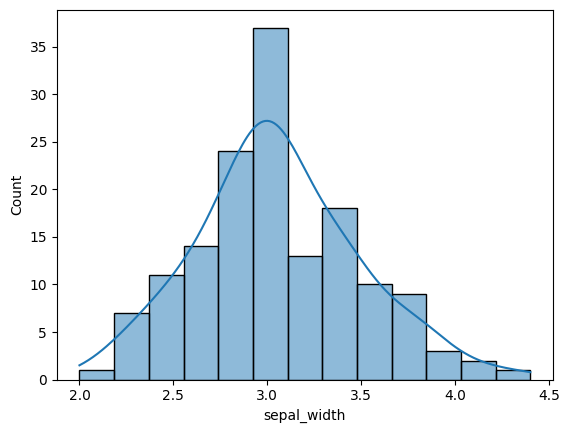

In [78]:
# 1. Distributon plot of petal_length 
sns.histplot(
    data=iris,
    x="sepal_width",
    kde=True,
)

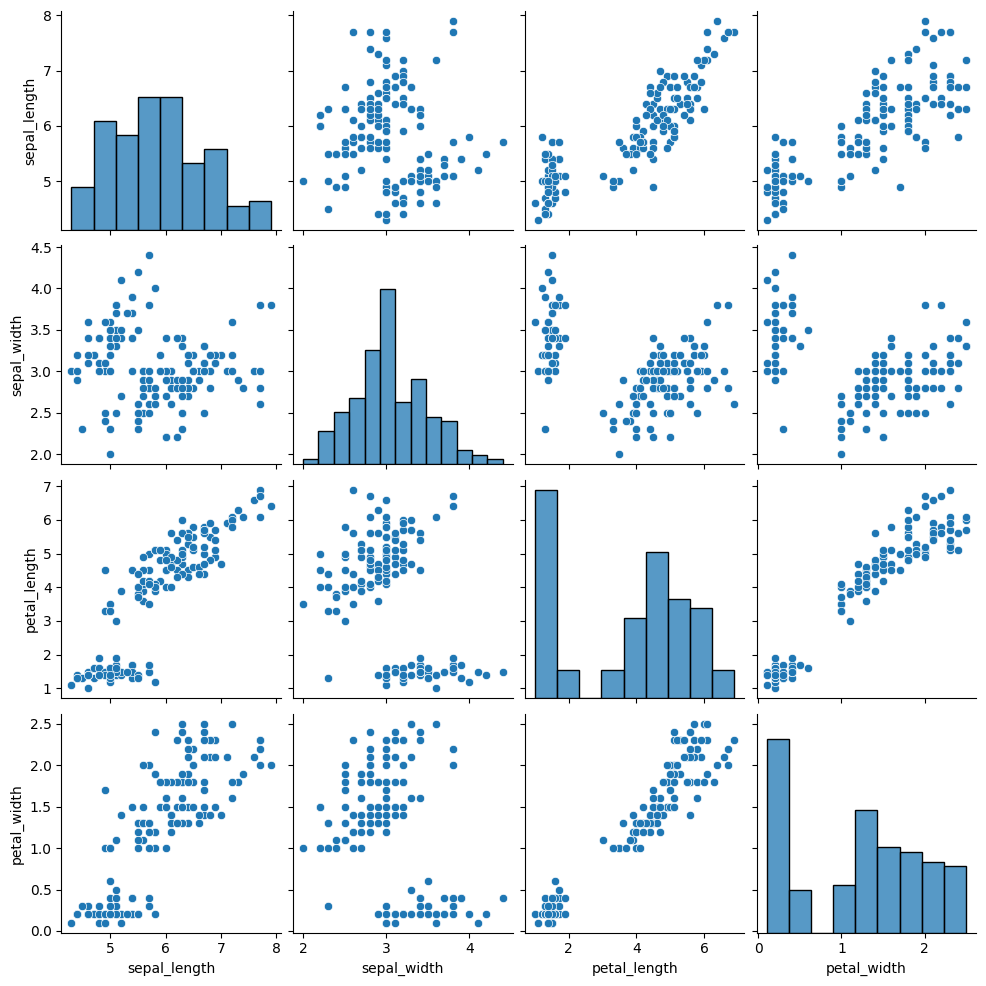

In [80]:
# Pairplot between all variables
sns.pairplot(iris)

In [82]:
list(iris.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

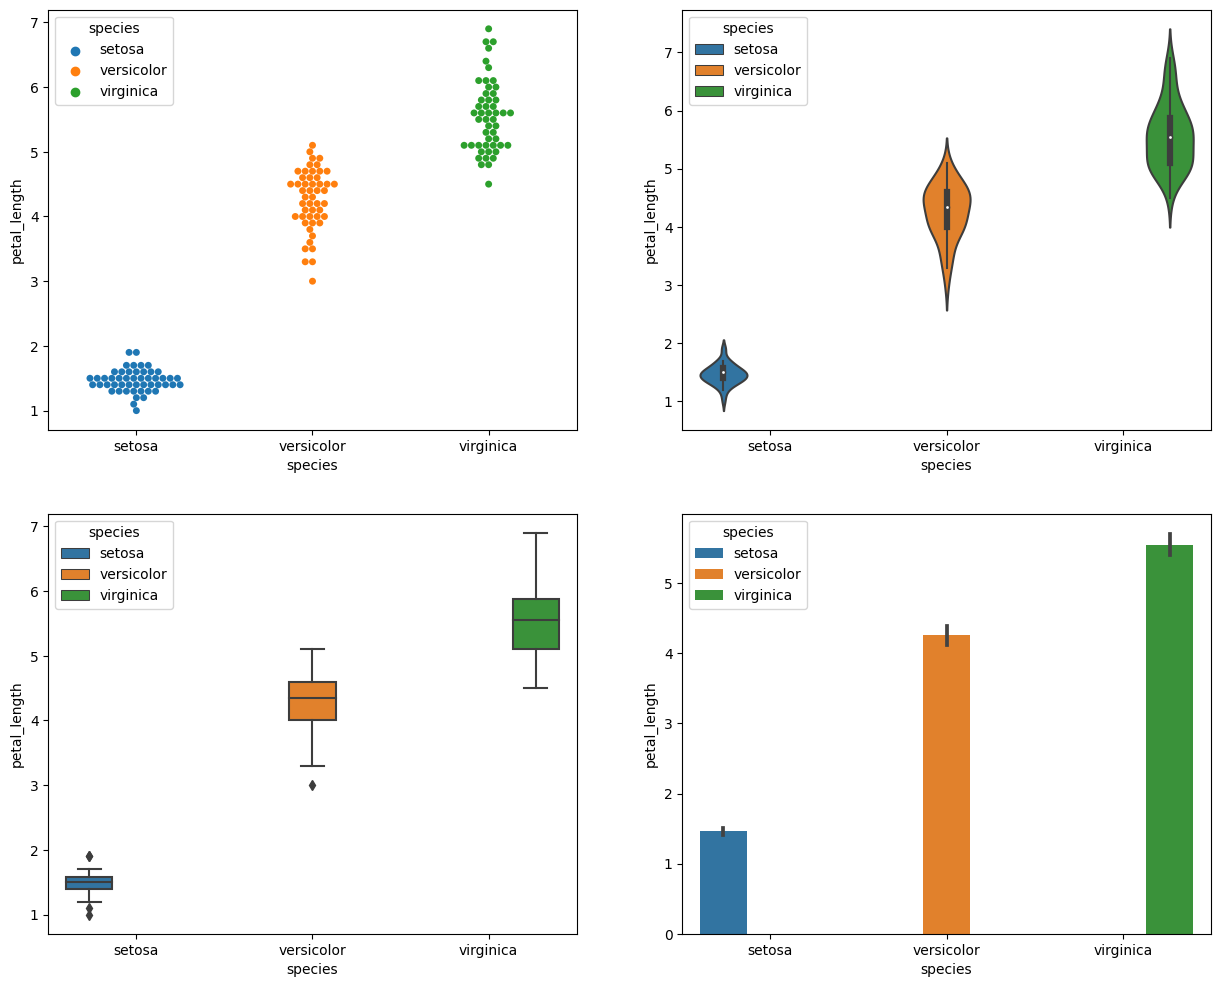

In [85]:

fig ,ax = pltt.subplots(figsize=(15,12), ncols=2,nrows=2)
sns.swarmplot(data=iris,x='species',y='petal_length',ax=ax[0,0],hue='species')
sns.violinplot(data=iris,x='species',y='petal_length',ax=ax[0,1], hue="species")
sns.boxplot(data=iris,x='species',y='petal_length',ax=ax[1,0], hue="species")
sns.barplot(data=iris,x='species',y='petal_length',ax=ax[1,1], hue="species")
pltt.show()